##Since I will work with an labeled data set, I think supervised machine learning models will fit the best. 

In [10]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

df = pd.read_csv("full_data.csv")

#Display the first five rows of the data of the full data.
df.head()

,Unnamed: 0,Cancer Type Detailed,Mutation Count,Fraction Genome Altered,Diagnosis Age,Sex,Somatic Status,Smoking History,Person Cigarette Smoking History Pack Year Value,TMB Nonsynonymous
0,0,Lung Adenocarcinoma,3.0,0.1539,56.0,Female,Matched,Former Smoker,36.427867,0.066667
1,1,Lung Adenocarcinoma,32.0,0.1318,56.0,Female,Matched,Former Smoker,36.427867,1.066667
2,2,Lung Adenocarcinoma,370.0,0.3385,69.0,Male,Matched,Former Smoker,36.427867,12.466667
3,3,Lung Adenocarcinoma,72.0,0.0758,69.0,Female,Matched,Former Smoker,36.427867,2.400000
4,4,Lung Adenocarcinoma,652.0,0.3153,78.0,Male,Matched,Former Smoker,36.427867,21.800000


In [11]:
#Clean dataset to delete first column
df = df.iloc[:, 1:]
df.head()

,Cancer Type Detailed,Mutation Count,Fraction Genome Altered,Diagnosis Age,Sex,Somatic Status,Smoking History,Person Cigarette Smoking History Pack Year Value,TMB Nonsynonymous
0,Lung Adenocarcinoma,3.0,0.1539,56.0,Female,Matched,Former Smoker,36.427867,0.066667
1,Lung Adenocarcinoma,32.0,0.1318,56.0,Female,Matched,Former Smoker,36.427867,1.066667
2,Lung Adenocarcinoma,370.0,0.3385,69.0,Male,Matched,Former Smoker,36.427867,12.466667
3,Lung Adenocarcinoma,72.0,0.0758,69.0,Female,Matched,Former Smoker,36.427867,2.400000
4,Lung Adenocarcinoma,652.0,0.3153,78.0,Male,Matched,Former Smoker,36.427867,21.800000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5071 entries, 0 to 5070
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Cancer Type Detailed                              5071 non-null   object 
 1   Mutation Count                                    5071 non-null   float64
 2   Fraction Genome Altered                           5071 non-null   float64
 3   Diagnosis Age                                     5071 non-null   float64
 4   Sex                                               5071 non-null   object 
 5   Somatic Status                                    5071 non-null   object 
 6   Smoking History                                   5071 non-null   object 
 7   Person Cigarette Smoking History Pack Year Value  5071 non-null   float64
 8   TMB Nonsynonymous                                 5071 non-null   float64
dtypes: float64(5), objec

###A correlation matrix to calculate the pairwise correlation coefficients between all variables.

In [13]:
cormat = df.corr()
round(cormat,2)

,Mutation Count,Fraction Genome Altered,Diagnosis Age,Person Cigarette Smoking History Pack Year Value,TMB Nonsynonymous
Mutation Count,1.00,0.26,0.00,0.16,0.80
Fraction Genome Altered,0.26,1.00,-0.05,0.17,0.15
Diagnosis Age,0.00,-0.05,1.00,0.08,-0.03
Person Cigarette Smoking History Pack Year Value,0.16,0.17,0.08,1.00,0.12
TMB Nonsynonymous,0.80,0.15,-0.03,0.12,1.00


###I add a correlation matrix to heat map. The basic idea of heatmaps is that they replace numbers with colors of varying shades, as indicated by the scale on the right. Cells that are lighter have higher values of r. This type of visualization can make it much easier to spot linear relationships between variables than a table of numbers. 

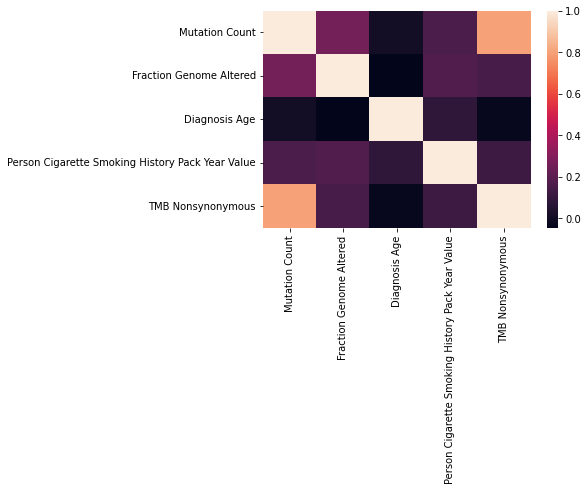

In [14]:
sns.heatmap(cormat);

In [15]:
# Remove the data conversion warning.
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [18]:
# Remove the Mutation Count for y.
df1 = df.drop(columns=['Mutation Count'])
y = df1

#Convert Cancer Type Detailed into numeric data
df['Cancer Type Detailed'].replace(['Lung Adenocarcinoma', 'Lung Squamos', 'Small Cell Lung Cancer', 'Lung Squamous Cell Carcinoma'],[1, 2, 3, 4], inplace=True)
#Convert Sex into numeric data
df['Sex'].replace(['Male', 'Female'],[0, 1], inplace=True)
#Convert Somatic Status into numeric data
df['Somatic Status'].replace(['Unmatched', 'Matched'],[0, 1], inplace=True)
#Convert Smoking History into numeric data
df['Smoking History'].replace(['Non Smoker', 'Former Smoker', 'Current Smoker', 'Reformed Smoker'],[0, 1, 2, 3], inplace=True)

X = df
X.head()

,Cancer Type Detailed,Mutation Count,Fraction Genome Altered,Diagnosis Age,Sex,Somatic Status,Smoking History,Person Cigarette Smoking History Pack Year Value,TMB Nonsynonymous
0,1,3.0,0.1539,56.0,1,1,1,36.427867,0.066667
1,1,32.0,0.1318,56.0,1,1,1,36.427867,1.066667
2,1,370.0,0.3385,69.0,0,1,1,36.427867,12.466667
3,1,72.0,0.0758,69.0,1,1,1,36.427867,2.400000
4,1,652.0,0.3153,78.0,0,1,1,36.427867,21.800000


###Create training and test data for model evaluation

###In Machine Learning, it's important as a first step to consider the nature of the problem. From my understanding, this is a regression problem because the problem I seek to solve is to determine a continuous numerical output or result. This is known as a regression problem, and, therefore, I need to use a regression algorithm. 


###Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

#The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
#..attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[ 1.00000000e+00 -3.19308190e-17  1.08235796e-15  2.29714002e-18
  -3.70699352e-17 -1.24130993e-16  7.06881612e-16 -3.67534722e-17
   1.43979933e-17]
 [ 9.64341078e-17  3.25260652e-18  1.00000000e+00  7.46845890e-17
   5.43789646e-16 -1.10243730e-15 -1.87070106e-15  1.14681485e-16
  -7.06442419e-17]
 [ 9.28466639e-16 -6.93889390e-17 -2.31238978e-15  1.00000000e+00
  -2.75252504e-15 -4.79102376e-16 -6.61905426e-17 -1.04083409e-17
   1.99899776e-16]
 [-1.42872063e-18  6.93889390e-18 -1.04520986e-15 -1.24080162e-16
   1.00000000e+00 -1.11664827e-15 -9.96517322e-17 -7.86046575e-18
   6.30599089e-17]
 [ 1.98328036e-17  3.38813179e-19  1.73831068e-16 -1.62974433e-18
   2.24956254e-16  1.00000000e+00 -3.25405706e-17  6.66403171e-19
  -1.58129272e-17]
 [ 1.01971091e-15 -1.90819582e-17  1.70973600e-15  6.60279123e-17
   8.49031945e-16 -3.72364869e-16  1.00000000e+00 -3.98986399e-17
   8.63431505e-17]
 [ 2.01761134e-15 -1.11022302e-15 -1.05448826e-14  1.37910516e-16
  -1.09791733e-15 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
# randomly assign some data to the test-set and the rest to the training-set

X_train.head()

,Cancer Type Detailed,Mutation Count,Fraction Genome Altered,Diagnosis Age,Sex,Somatic Status,Smoking History,Person Cigarette Smoking History Pack Year Value,TMB Nonsynonymous
4412,1,6.0,0.044200,64.645512,1,1,1,20.000000,5.188189
4482,1,47.0,0.072400,64.645512,1,1,1,4.650000,40.640810
2060,1,37.0,0.258468,60.000000,0,1,1,36.427867,1.233333
3389,1,240.0,0.134300,70.000000,0,1,3,10.000000,8.066667
4475,1,3.0,0.179100,58.000000,1,1,1,36.427867,2.594094


##Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 1.00
Test set score: 1.00


In [29]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.99
Test set score: 0.99


In [30]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 1.00
Test set score: 1.00


## Lasso Regression

In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
np.sum(lasso.coef_ != 0)

13

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

print("lasso.coef_: {}".format(lasso.coef_))

Training set score: 0.51
Test set score: 0.51
Number of features used: 13
lasso.coef_: [[ 4.01229803e-01  5.19953422e-04  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00  9.07676643e-03
  -0.00000000e+00]
 [ 0.00000000e+00  1.91798887e-04  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  9.85685640e-01
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00]
 [-0.00000000e+00 -3.22505785e-04 -0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00 -0.00000000e+00 -2.26942564e-03
   0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  9.45895859e-04  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00  0.00000000e+00  1.56008197e-02
  -0.00000000e+00]
 [ 0.00

In [34]:
# Lower alpha to fit a more complex model
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.87
Test set score: 0.87
Number of features used: 26


In [35]:
# Fit an even more complex model... 

lasso00001 = Lasso(alpha=100, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))


Training set score: 0.20
Test set score: 0.21
Number of features used: 3
